In [31]:
import numpy as np

Первая задача

In [39]:
L = np.random.random((10,3))
print(L)
print(L[np.arange(10), np.argmin(np.abs(L-0.5), axis = 1)])

[[0.34342817 0.75503653 0.0756037 ]
 [0.59279772 0.0683015  0.65497634]
 [0.08167489 0.45750368 0.2959456 ]
 [0.38420072 0.41498466 0.45808612]
 [0.249329   0.42300581 0.40419008]
 [0.70141284 0.40197024 0.27179368]
 [0.39919375 0.69898203 0.25308095]
 [0.91895959 0.07029976 0.81769431]
 [0.88341336 0.12026876 0.66854485]
 [0.36599982 0.30197717 0.90566451]]
[0.34342817 0.59279772 0.45750368 0.45808612 0.42300581 0.40197024
 0.39919375 0.81769431 0.66854485 0.36599982]


Вторая задача

In [42]:
L = np.random.random((6,6))
print(L)
print(np.sum(L,axis=1)/np.min(L,axis=0))

[[0.03851649 0.85160409 0.36454686 0.97192703 0.02634973 0.84273255]
 [0.46083206 0.06045861 0.89981777 0.88184364 0.56643966 0.88320417]
 [0.91520983 0.97908002 0.02589539 0.84915984 0.3772855  0.79673155]
 [0.44286795 0.44259198 0.12564075 0.7554118  0.91080151 0.56226274]
 [0.34765559 0.40374641 0.82009753 0.91584437 0.09958621 0.6487108 ]
 [0.21373457 0.92952081 0.09921868 0.30346123 0.84590281 0.59112458]]
[ 80.37276069  62.0688407  152.28048294  10.67542225 122.79599797
   5.30528257]


Третья задача

In [293]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
mask = x == 0
print(np.max(x[np.delete(np.concatenate([[False],mask]),-1)]))

5


Четвертая задача

In [1480]:
print(np.ones(10) + np.bincount(np.array([0, 1, 2, 3, 5, 5, 5, 8]),minlength = len(x)) ) 

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


Пятая задача -- k-means

In [783]:
def matrNorm(X):
    X = X * X
    Y = np.flip(X,axis=2)
    Z = X + Y
    #print(Z)
    Z = np.sum(Z,axis=0)
    return Z[0][0]

In [982]:
def kMeans(k,A,eps):
    center = np.random.sample((k,1,2))
    center_new = center
    length = len(A)
    otklon = 1
    while otklon > eps:
        X = A-center_new
        #print(X)
        X = X * X
        #print(X)
        Y = np.flip(X,axis=2)
        #print(Y)
        Z = X + Y #это матрица норм 
        #print(Z)
        Z = np.argmin(Z,axis=0)
        #print(Z)
        #Z = [[1],[2],[2],[0]]
        Z = np.delete(Z,slice(1),axis=1)
        P = np.zeros((length,k))
        Q = np.zeros((length,k))
        O = np.arange(k)
        Q = Q + O
        P = Z + P
        #print(Q)
        #print(P)
        e = np.zeros((length,k))-1
        I = np.where(P!=Q,e,P)
        I = np.where(I < 0, np.zeros((length,k)),np.ones((length,k)))
        #I = np.transpose(I)
        I1 = np.reshape(I,(length,k,1))
        I = I1 + np.zeros((length,k,2))
        #print(I)
        mat = np.reshape(A,(length,1,2)) + np.zeros((length,k,2))
        matnew = mat * I
        #print(matnew)
        #nonZeroCol = (matnew != 0).sum(0)
        #print(nonZeroCol)
        L = matnew.sum(0) / (matnew != 0).sum(0)
        L = np.reshape(L,(k,1,2))
        center = center_new
        center_new = L
        otklon = matrNorm(center_new - center)
        #print(otklon)
        #
        D = np.reshape(A,(length,1,2))
        cen2 = np.reshape(L,(1,k,2))
        D1 = D-cen2
        D2 = D1 * D1
        D3 = np.flip(D2,axis=2)
        D2 = D2 + D3
        D3 = np.delete(D2,slice(1),axis=2)
        D3 = D3 * I1
        #print(I1)
        #print(D3)
        disp = D3.sum()/(length*length)
        #print(disp)
    return center_new,disp
#Для примера взял какой-то массив и 2 кластера
A = [[1,1],[2,2],[3,3],[4,4],[5,5],[6,6],[6,3],[2,9],[1,12],[23,9],[11,11],[-7,-7],[-1,-1]] 
eps = 0.001
k = 2
U,disp = kMeans(k,A,eps)
print(U,disp)

[[[ 5.81818182  5.90909091]]

 [[-4.         -4.        ]]] 3.482517482517482


Шестая задача -- визуализация и Elbow method

In [1002]:
url = 'https://raw.githubusercontent.com/sharmaroshan/Clustering-of-Mall-Customers/master/Mall_Customers.csv'
data = np.loadtxt(url, delimiter=',', dtype=object, skiprows=1)
data[:5]

array([['0001', 'Male', '19', '15', '39'],
       ['0002', 'Male', '21', '15', '81'],
       ['0003', 'Female', '20', '16', '6'],
       ['0004', 'Female', '23', '16', '77'],
       ['0005', 'Female', '31', '17', '40']], dtype=object)

In [1003]:
data[:, 1] = data[:, 1] == 'Male'
data = data.astype(float)
data[:5]

array([[ 1.,  1., 19., 15., 39.],
       [ 2.,  1., 21., 15., 81.],
       [ 3.,  0., 20., 16.,  6.],
       [ 4.,  0., 23., 16., 77.],
       [ 5.,  0., 31., 17., 40.]])

In [985]:
import matplotlib.pyplot as plt

Age and actual income

In [1032]:
age = np.reshape(data[:,2],(200,1)) / np.max(np.reshape(data[:,2],(200,1)))
income = np.reshape(data[:,3],(200,1)) / np.max(np.reshape(data[:,3],(200,1)))
score = np.reshape(data[:,4],(200,1)) / np.max(np.reshape(data[:,4],(200,1)))
AgeInc = np.concatenate([age,income],axis = 1)
#AgeInc[:5]

In [1496]:
k = 2
eps = 0.001
over = 2
Rez, Disp_old = kMeans(k,AgeInc,eps)
#print(Disp_old)
while over > 1.5:
    k = k+1
    Rez,Disp_new = kMeans(k,AgeInc,eps)
    over = Disp_old / Disp_new
    Disp_old = Disp_new
    #print(over)
print(Rez,Disp_new) 
#print(np.reshape(Rez,(3,2)))

[[[0.43847926 0.52366376]]

 [[0.38913043 0.22834021]]

 [[0.79648712 0.36891229]]

 [[0.55898618 0.73981634]]] 9.962309102884245e-05


1
2
3
4
5
6
7


<function matplotlib.pyplot.show(*args, **kw)>

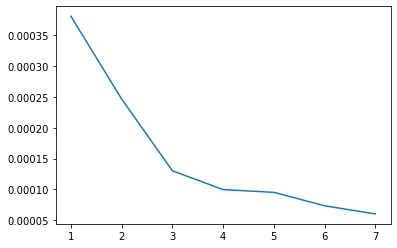

In [1506]:
dis = np.zeros(7)
for i in range (1,8):
    print(i)
    Ux,dis[i-1] = kMeans(i,AgeInc,eps)
plt.plot(*np.array([np.arange(1,8),dis]))
plt.show

Подойдет k = 3 или 4 (я взял 4, тк 3 будет на следующем графике)

In [1168]:
Rez = np.reshape(Rez,(4,2))
#print(Rez)
a = np.zeros((0,2))
b = np.zeros((0,2))
c = np.zeros((0,2))
d = np.zeros((0,2))
for i in range (0,200):
    rast1 = (age[i][0] - Rez[0][0])*(age[i][0] - Rez[0][0]) + (income[i][0] - Rez[0][1])*(income[i][0] - Rez[0][1])
    rast2 = (age[i][0] - Rez[1][0])*(age[i][0] - Rez[1][0]) + (income[i][0] - Rez[1][1])*(income[i][0] - Rez[1][1])
    rast3 = (age[i][0] - Rez[2][0])*(age[i][0] - Rez[2][0]) + (income[i][0] - Rez[2][1])*(income[i][0] - Rez[2][1])
    rast4 = (age[i][0] - Rez[3][0])*(age[i][0] - Rez[3][0]) + (income[i][0] - Rez[3][1])*(income[i][0] - Rez[3][1])
    rast = min(rast1,rast2,rast3,rast4)
    if rast == rast1:
        a = np.append(a,np.reshape(AgeInc[i],(1,2)),axis = 0)
    elif rast == rast2:
        b = np.append(b,np.reshape(AgeInc[i],(1,2)),axis = 0)
    elif rast == rast3:
        c = np.append(c,np.reshape(AgeInc[i],(1,2)),axis = 0)
    else:
        d = np.append(d,np.reshape(AgeInc[i],(1,2)),axis = 0)

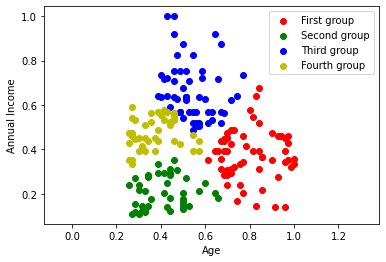

In [1171]:
plt.scatter(*a.T, c='r', label='First group')
plt.scatter(*(b ).T, c='g', label='Second group')
plt.scatter(*(c ).T, c='b', label='Third group')
plt.scatter(*(d ).T, c='y', label='Fourth group')
plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Annual Income')
plt.legend()
plt.show()

Age and Spending score

In [1497]:
AgeScor = np.concatenate([age,score],axis = 1)
k = 2
eps = 0.001
over = 2
Rez, Disp_old = kMeans(k,AgeScor,eps)
#print(Disp_old)
while over > 1.5:
    k = k+1
    Rez,Disp_new = kMeans(k,AgeScor,eps)
    over = Disp_old / Disp_new
    Disp_old = Disp_new
    #print(over)
print(Rez,Disp_new) 
#print(np.reshape(Rez,(3,2)))

[[[0.46917293 0.27680312]]

 [[0.79472527 0.3998446 ]]

 [[0.41794872 0.76469826]]] 0.00017243955891201276


1
2
3
4
5
6
7
8


<function matplotlib.pyplot.show(*args, **kw)>

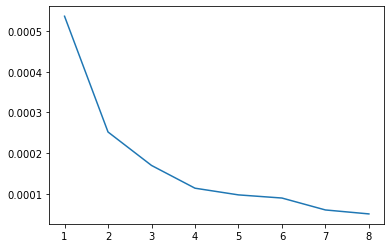

In [1499]:
dis = np.zeros(8)
for i in range (1,9):
    print(i)
    Ux,dis[i-1] = kMeans(i,AgeScor,eps)
plt.plot(*np.array([np.arange(1,9),dis]))
plt.show

Наверное, лучше всего взять k = 3 или 4, давайте возьмем 3

In [1195]:
Rez = np.reshape(Rez,(3,2))
#print(Rez)
a1 = np.zeros((0,2))
b1 = np.zeros((0,2))
c1 = np.zeros((0,2))
for i in range (0,200):
    rast1 = (age[i][0] - Rez[0][0])*(age[i][0] - Rez[0][0]) + (score[i][0] - Rez[0][1])*(score[i][0] - Rez[0][1])
    rast2 = (age[i][0] - Rez[1][0])*(age[i][0] - Rez[1][0]) + (score[i][0] - Rez[1][1])*(score[i][0] - Rez[1][1])
    rast3 = (age[i][0] - Rez[2][0])*(age[i][0] - Rez[2][0]) + (score[i][0] - Rez[2][1])*(score[i][0] - Rez[2][1])
    rast = min(rast1,rast2,rast3)
    if rast == rast1:
        a1 = np.append(a1,np.reshape(AgeScor[i],(1,2)),axis = 0)
    elif rast == rast2:
        b1 = np.append(b1,np.reshape(AgeScor[i],(1,2)),axis = 0)
    else:
        c1 = np.append(c1,np.reshape(AgeScor[i],(1,2)),axis = 0)

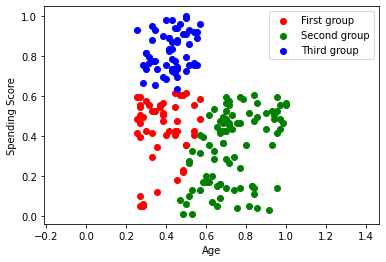

In [1196]:
plt.scatter(*a1.T, c='r', label='First group')
plt.scatter(*(b1 ).T, c='g', label='Second group')
plt.scatter(*(c1 ).T, c='b', label='Third group')
plt.axis('equal')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

Income and score

In [1521]:
IncScor = np.concatenate([score,income],axis = 1)
k = 2
eps = 0.001
over = 2
Rez, Disp_old = kMeans(k,IncScor,eps)
#print(Disp_old)
while over > 1.25:
    k = k+1
    Rez,Disp_new = kMeans(k,IncScor,eps)
    over = Disp_old / Disp_new
    Disp_old = Disp_new
    #print(over)
print(Rez,Disp_new) 
#print(np.reshape(Rez,(3,2)))

[[[0.80591631 0.75703858]]

 [[0.48207348 0.37835887]]

 [[0.80165289 0.18779031]]

 [[0.84282828 0.56145985]]

 [[0.15740741 0.52524331]]] 0.00012703541429370566


1
2
3
4
5
6
7


<function matplotlib.pyplot.show(*args, **kw)>

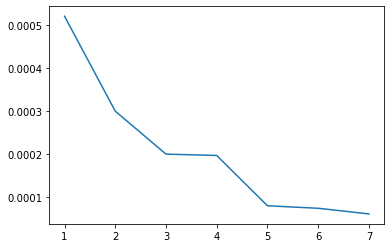

In [1508]:
dis = np.zeros(7)
for i in range (1,8):
    print(i)
    Ux,dis[i-1] = kMeans(i,IncScor,eps)
plt.plot(*np.array([np.arange(1,8),dis]))
plt.show

Здесь, как видно, лучше всего будет 5

In [1522]:
Rez = np.reshape(Rez,(5,2))
#print(Rez)
a2 = np.zeros((0,2))
b2 = np.zeros((0,2))
c2 = np.zeros((0,2))
d2 = np.zeros((0,2))
e2 = np.zeros((0,2))
for i in range (0,200):
    rast1 = (score[i][0] - Rez[0][0])*(score[i][0] - Rez[0][0]) + (income[i][0] - Rez[0][1])*(income[i][0] - Rez[0][1])
    rast2 = (score[i][0] - Rez[1][0])*(score[i][0] - Rez[1][0]) + (income[i][0] - Rez[1][1])*(income[i][0] - Rez[1][1])
    rast3 = (score[i][0] - Rez[2][0])*(score[i][0] - Rez[2][0]) + (income[i][0] - Rez[2][1])*(income[i][0] - Rez[2][1])
    rast4 = (score[i][0] - Rez[3][0])*(score[i][0] - Rez[3][0]) + (income[i][0] - Rez[3][1])*(income[i][0] - Rez[3][1])
    rast5 = (score[i][0] - Rez[4][0])*(score[i][0] - Rez[4][0]) + (income[i][0] - Rez[4][1])*(income[i][0] - Rez[4][1])
    rast = min(rast1,rast2,rast3,rast4,rast5)
    if rast == rast1:
        a2 = np.append(a2,np.reshape(IncScor[i],(1,2)),axis = 0)
    elif rast == rast2:
        b2 = np.append(b2,np.reshape(IncScor[i],(1,2)),axis = 0)
    elif rast == rast3:
        c2 = np.append(c2,np.reshape(IncScor[i],(1,2)),axis = 0)
    elif rast == rast4:
        d2 = np.append(d2,np.reshape(IncScor[i],(1,2)),axis = 0)
    else:
        e2 = np.append(e2,np.reshape(IncScor[i],(1,2)),axis = 0)

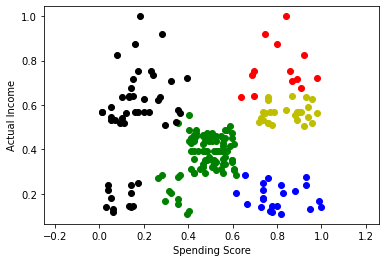

In [1523]:
plt.scatter(*a2.T, c='r', label='First group')
plt.scatter(*(b2 ).T, c='g', label='Second group')
plt.scatter(*(c2 ).T, c='b', label='Third group')
plt.scatter(*(d2 ).T, c='y', label='Fourth group')
plt.scatter(*(e2 ).T, c='black', label='Fifth group')
plt.axis('equal')
plt.xlabel('Spending Score')
plt.ylabel('Actual Income')
#plt.legend()
plt.show()